# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

2. Scroll down to API and click Create New API Token.

3. Open up `kaggle.json` and use the username and key.


## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

The syntax of the command is incorrect.
'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "----"
kaggle_key = "---"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [8]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:

predictor = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

### Review AutoGluon's training run with ranking of models that did the best.

In [10]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.116753  root_mean_squared_error      21.155264  362.082997                0.000000           0.049943            3       True         13
1   RandomForestMSE_BAG_L2  -53.510764  root_mean_squared_error      20.722668  345.549226                0.561211          67.850896            2       True         12
2          LightGBM_BAG_L2  -54.890519  root_mean_squared_error      20.594053  294.182159                0.432596          16.483829            2       True         11
3        LightGBMXT_BAG_L2  -60.714153  root_mean_squared_error      28.467947  314.032578                8.306490          36.334248            2       True         10
4      WeightedEnsemble_L2  -84.146423  root_mean_squared_error       0.034001    0.156033   

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927213,
  'KNeighborsDist_BAG_L1': -84.14642264302962,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.55209143577434,
  'CatBoost_BAG_L1': -130.56690985866868

### Create predictions from test dataset

In [11]:
predictions = predictor.predict(test)
predictions = {'datetime': test['datetime'], 'Pred_count': predictions}
predictions = pd.DataFrame(data=predictions)
predictions.head()

datetime  Pred_count
0 2011-01-20 00:00:00   22.885899
1 2011-01-20 01:00:00   42.287304
2 2011-01-20 02:00:00   46.484844
3 2011-01-20 03:00:00   49.028969
4 2011-01-20 04:00:00   51.202511

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [12]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

datetime   Pred_count
count                           6493  6493.000000
mean   2012-01-13 09:27:47.765285632   100.025482
min              2011-01-20 00:00:00     3.235392
25%              2011-07-22 15:00:00    19.805637
50%              2012-01-20 23:00:00    63.990761
75%              2012-07-20 17:00:00   165.455078
max              2012-12-31 23:00:00   367.226410
std                              NaN    89.181915

In [13]:
# How many negative values do we have?
neg = predictions.groupby(predictions['Pred_count'])

# lambda function
def minus(val):
   return val[val < 0].sum()

print(neg['Pred_count'].agg([('negcount', minus)]))

            negcount
Pred_count          
3.235392         0.0
3.408119         0.0
3.544232         0.0
3.560749         0.0
3.566258         0.0
...              ...
364.566315       0.0
364.836029       0.0
366.892120       0.0
366.933533       0.0
367.226410       0.0

[6151 rows x 1 columns]


In [14]:
# Set them to zero
predictions[predictions['Pred_count']<0] = 0

In [15]:
predictions.describe()

datetime   Pred_count
count                           6493  6493.000000
mean   2012-01-13 09:27:47.765285632   100.025482
min              2011-01-20 00:00:00     3.235392
25%              2011-07-22 15:00:00    19.805637
50%              2012-01-20 23:00:00    63.990761
75%              2012-07-20 17:00:00   165.455078
max              2012-12-31 23:00:00   367.226410
std                              NaN    89.181915

In [16]:
predictions.head()

datetime  Pred_count
0 2011-01-20 00:00:00   22.885899
1 2011-01-20 01:00:00   42.287304
2 2011-01-20 02:00:00   46.484844
3 2011-01-20 03:00:00   49.028969
4 2011-01-20 04:00:00   51.202511

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions['Pred_count']
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [01:24<32:57, 96.7B/s]
 90%|█████████ | 176k/195k [01:24<00:06, 2.99kB/s]
100%|██████████| 195k/195k [01:26<00:00, 2.32kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### Initial score of 1.39920

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

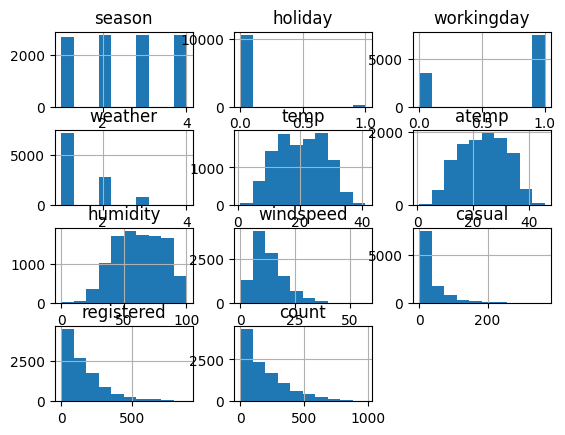

In [19]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [22]:
# create a new feature
train = pd.read_csv('train.csv', parse_dates=['datetime'])

train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [24]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2  
3        75        0.0       3          10     13  2011      1    1     3  
4        75        0.0       0           1      1  2011      1    1     4

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

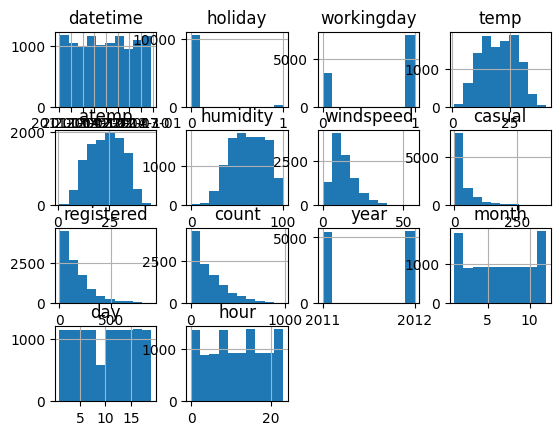

In [25]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [26]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

	-38.1182	 = Validation score   (-root_mean_squared_error)
	90.8s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 7.79s of the 147.51s of remaining time.
	-38.1081	 = Validation score   (-root_mean_squared_error)
	17.83s	 = Training   runtime
	0.86s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 125.26s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1': 0.4, 'LightGBMXT_BAG_L1': 0.36, 'RandomForestMSE_BAG_L1': 0.12, 'KNeighborsDist_BAG_L1': 0.04, 'CatBoost_BAG_L1': 0.04, 'ExtraTreesMSE_BAG_L1': 0.04}
	-32.4187	 = Validation score   (-root_mean_squared_error)
	0.05s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 106 L2 models ...
Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 125.14s of the 125.1s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, me

In [27]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.321889  root_mean_squared_error      40.092079  402.656349                0.000000           0.025981            3       True         12
1          LightGBM_BAG_L2  -30.599795  root_mean_squared_error      36.494398  287.641776                0.546884          22.021480            2       True         10
2        LightGBMXT_BAG_L2  -30.955635  root_mean_squared_error      38.864244  297.219949                2.916730          31.599653            2       True          9
3   RandomForestMSE_BAG_L2  -31.785639  root_mean_squared_error      36.628466  349.009234                0.680951          83.388939            2       True         11
4      WeightedEnsemble_L2  -32.418706  root_mean_squared_error      35.892728  265.540072   

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927213,
  'KNeighborsDist_BAG_L1': -84.14642264302962,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.42564244339945,
  'CatBoost_BAG_L1': -38.1182173288243,
  'ExtraTreesMSE_BAG_L1': -38.108107585089144,
  'WeightedEnsemble_L

In [28]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = {'datetime': test['datetime'], 'Pred_count': predictions_new_features}
predictions_new_features = pd.DataFrame(data=predictions_new_features)
predictions_new_features.head()

datetime  Pred_count
0 2011-01-20 00:00:00   15.548494
1 2011-01-20 01:00:00   10.331716
2 2011-01-20 02:00:00    8.953756
3 2011-01-20 03:00:00    7.965948
4 2011-01-20 04:00:00    6.694967

In [29]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features['Pred_count']<0] = 0

In [30]:
predictions_new_features.describe()

datetime   Pred_count
count                           6493  6493.000000
mean   2012-01-13 09:27:47.765285632   163.198853
min              2011-01-20 00:00:00     2.124089
25%              2011-07-22 15:00:00    49.309345
50%              2012-01-20 23:00:00   126.454758
75%              2012-07-20 17:00:00   230.766891
max              2012-12-31 23:00:00   809.200806
std                              NaN   145.055237

In [32]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictions_new_features['Pred_count']
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [33]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [01:24<32:55, 96.7B/s]
 53%|█████▎    | 104k/195k [01:24<00:52, 1.75kB/s]
100%|██████████| 195k/195k [01:26<00:00, 2.31kB/s]


In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.47165`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag
## From autogluon documentation
nn_options = {  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability 
}

gbm_options = {  
    'num_boost_round': 100,  # number of boosting rounds 
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  }  

num_trials = 3  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality', hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3 -41.282342       5.709038  576.037574                0.000790           0.277052            3       True         10
1        LightGBM_BAG_L2/T0 -41.307625       3.033459  384.648088                0.130620           4.754860            2       True          6
2        LightGBM_BAG_L1/T2 -42.384438       0.139868    4.150900                0.139868           4.150900            1       True          3
3       WeightedEnsemble_L2 -42.384438       0.140630    4.430936                0.000763           0.280037            2       True          5
4        LightGBM_BAG_L1/T0 -42.790304       0.152393    4.254586                0.152393           4.254586            1       True          1
5        LightGBM_BAG_L2/T2 -43.965599       3.033939  384.676854         

{'leaderboard':                       model  score_val  ...  can_infer  fit_order
 0       WeightedEnsemble_L3 -41.282342  ...       True         10
 1        LightGBM_BAG_L2/T0 -41.307625  ...       True          6
 2        LightGBM_BAG_L1/T2 -42.384438  ...       True          3
 3       WeightedEnsemble_L2 -42.384438  ...       True          5
 4        LightGBM_BAG_L1/T0 -42.790304  ...       True          1
 5        LightGBM_BAG_L2/T2 -43.965599  ...       True          8
 6        LightGBM_BAG_L2/T1 -44.192568  ...       True          7
 7        LightGBM_BAG_L1/T1 -55.501303  ...       True          2
 8  NeuralNetMXNet_BAG_L2/T0 -56.404482  ...       True          9
 9  NeuralNetMXNet_BAG_L1/T0 -83.645148  ...       True          4
 
 [10 rows x 9 columns],
 'max_stack_level': 3,
 'model_best': 'WeightedEnsemble_L3',
 'model_fit_times': {'LightGBM_BAG_L1/T0': 4.25458550453186,
  'LightGBM_BAG_L1/T1': 4.189963340759277,
  'LightGBM_BAG_L1/T2': 4.150899648666382,
  'LightGBM_BA

In [ ]:
prediction_new_hpo = predictor_new_hpo.predict(test)
prediction_new_hpo = {'datetime': test['datetime'], 'Pred_count': prediction_new_hpo}
prediction_new_hpo = pd.DataFrame(data=prediction_new_hpo)
prediction_new_hpo.head()

In [ ]:
# Remember to set all negative values to zero
prediction_new_hpo[prediction_new_hpo['Pred_count']<0] = 0

In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('/content/submission.csv')
submission_new_hpo["count"] = prediction_new_hpo['Pred_count']
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `.50893`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

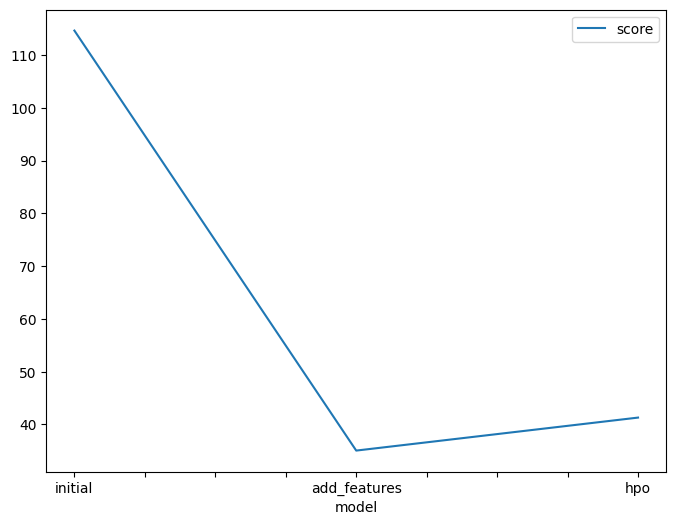

In [37]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [114.633955,  35.029454, 41.282342]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

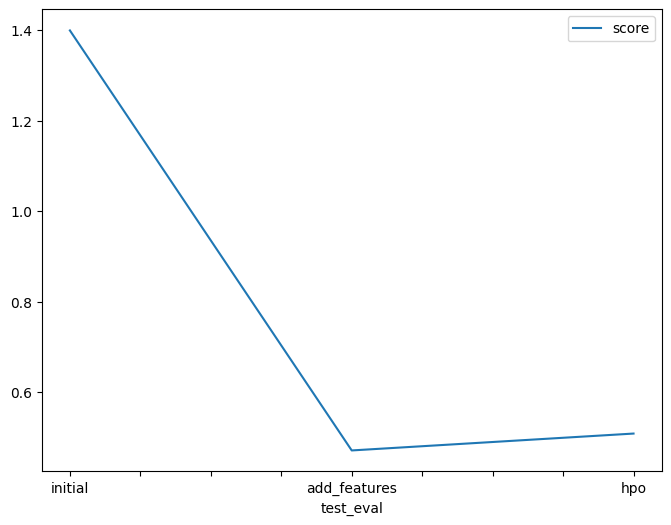

In [38]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39920,  0.47165, 0.50893]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [39]:
# The 3 hyperparameters we tuned with the kaggle score as the result
hyperparams_df = pd.DataFrame({
    "model": ["initial_model", "add_features_model", "hpo_model"],
    "hpo1": ['default_vals', 'default_vals', 'GBM: num_leaves: lower=26, upper=66'],
    "hpo2": ['default_vals', 'default_vals', 'NN: dropout_prob: 0.0, 0.5'],
    "hpo3": ['default_vals', 'default_vals', 'GBM: num_boost_round: 100'],
    "score": [1.39920,  0.47165, 0.50893]
})

In [40]:
hyperparams_df.head()

model                                 hpo1  \
0       initial_model                         default_vals   
1  add_features_model                         default_vals   
2           hpo_model  GBM: num_leaves: lower=26, upper=66   

                         hpo2                       hpo3    score  
0                default_vals               default_vals  1.39920  
1                default_vals               default_vals  0.47165  
2  NN: dropout_prob: 0.0, 0.5  GBM: num_boost_round: 100  0.50893

In [41]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [42]:
sub_new = pd.read_csv('submission_new_features.csv')

Plot time series of train and test data

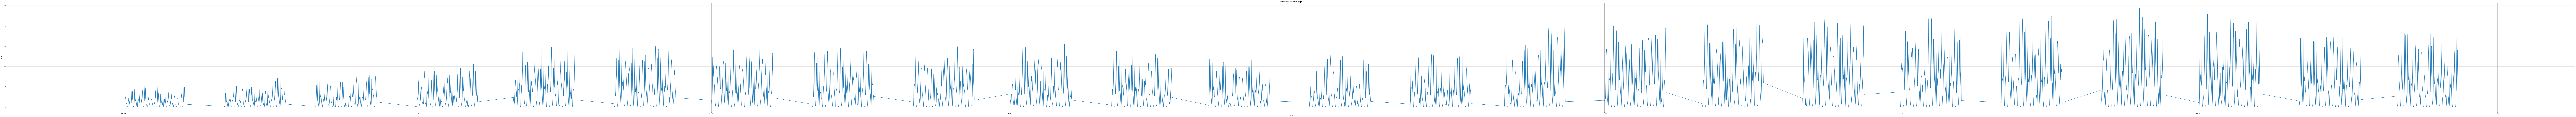

In [43]:
import matplotlib.pyplot as plt
series = train["count"].to_numpy()
time = train["datetime"].to_numpy()


plt.figure(figsize=(350, 15))
plot_series(time, series)
plt.title("Train Data time series graph")
#plot_series(time1, series1)
plt.show()

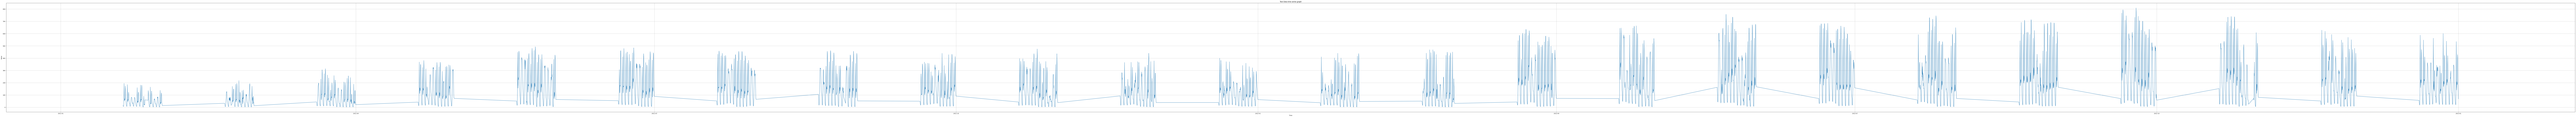

In [44]:
sub_new.loc[:, "datetime"] = pd.to_datetime(sub_new.loc[:, "datetime"])

series1 = sub_new["count"].to_numpy()
time1 = sub_new["datetime"].to_numpy()

plt.figure(figsize=(350, 15))
#plot_series(time, series)
plot_series(time1, series1)
plt.title("Test Data time series graph")
plt.show()

Prediction with XGBoost

In [45]:
import xgboost as xgb

In [46]:
train_df = pd.read_csv('train.csv')

In [47]:
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.loc[:, "datetime"] = pd.to_datetime(train_df.loc[:, "datetime"])
test_df.loc[:, "datetime"] = pd.to_datetime(test_df.loc[:, "datetime"])

train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour

In [ ]:
trainxgb = train_df.drop(['casual', 'registered','count', 'datetime'], axis=1)
trainxgb.head()

season  holiday  workingday  weather  ...  year  month  day  hour
0       1        0           0        1  ...  2011      1    1     0
1       1        0           0        1  ...  2011      1    1     1
2       1        0           0        1  ...  2011      1    1     2
3       1        0           0        1  ...  2011      1    1     3
4       1        0           0        1  ...  2011      1    1     4

[5 rows x 12 columns]

In [ ]:
countxgb = train_df['count']
countxgb.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
train_xgb = xgb.DMatrix(
    trainxgb, countxgb
)

params = {"objective": "reg:linear"} #"objective":"reg:linear"
bst = xgb.train(params, train_xgb)

bst.predict(train_xgb)

[21:17:55] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


array([ 35.479843,  31.946043,  25.44875 , ..., 185.26509 , 141.68748 ,
       111.29078 ], dtype=float32)

In [ ]:
!jupyter nbconvert --to html bike_sharing.ipynb